In [1]:
%load_ext autoreload
%autoreload 2

In [6]:
from geomloss import SamplesLoss
from tqdm import tqdm
from matplotlib import pyplot as plt
from scipy.stats import wasserstein_distance
from icecream import ic
from collections import Counter
from itertools import filterfalse
import numpy as np
import seaborn as sns
import sys
sys.path.append("../")
from template.templates import MPI_DESC

In [4]:
# models = ['opt-125m', 'opt-350m', 'opt-1.3b', 'opt-2.7b', 'opt-6.7b', 'opt-13b']
models = ['gpt2', 'gpt2-medium', 'gpt2-large', 'gpt2-xl', 'gpt-neo-125m', 'gpt-neo-1.3b', 'gpt-neo-2.7b']
dir = '../checkpoint/mpis/Constraint/order-symmetry/'
# Config
ans_type = "desc"
tmp_type = "non-index"

<Figure size 432x288 with 0 Axes>

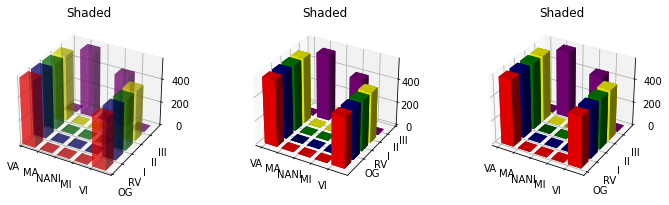

In [90]:

# https://www.youtube.com/watch?v=k3FA2nUHEEI
# x_label = MPI_DESC
x_label = ['VA', 'MA', 'NANI', 'MI', 'VI']
y_label = ['OG', "RV", "I", 'II', 'III']

_x, _y = np.arange(5)+1, np.arange(5)+1
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()

# ic(x)
# 

dist = np.array([
    [566,0, 0, 0, 433],
    [566,0, 0, 0, 433],
    [566,0, 0, 0, 433],
    [566,0, 0, 0, 433],
    [0, 566, 0, 433, 0]
]).reshape((-1,))

# ax1 = plt.axes(projection='3d')

bottom = np.zeros_like(dist)
width = depth = 0.75

color= ['red', 'blue', 'green', 'yellow', 'purple']*5

color=['red']*5 + ['navy']*5 + ['green']*5 + ['yellow']*5 + ['purple']*5
fig = plt.figure()
fig = plt.figure(figsize=(12, 3))
ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

ax2.tick_params(direction='out', pad=0)

ax1.bar3d(x, y, bottom, width, depth, dist, color=color, alpha=0.5, shade=True)
ax1.set_xticks(ticks=_x,labels=x_label)
ax1.set_yticks(ticks=_y,labels=y_label)
ax1.set_xlim(1, 6)
ax1.set_ylim(1, 6)
ax1.set_title('Shaded')

ax2.bar3d(x, y, bottom, width, depth, dist, color=color, shade=True)
ax2.set_xticks(ticks=list(_x),labels=x_label)
ax2.set_yticks(ticks=_y+1.5,labels=y_label)
ax2.set_title('Shaded')

ax3.bar3d(x, y, bottom, width, depth, dist, color=color, shade=True)
ax3.set_xticks(ticks=_x,labels=x_label)
ax3.set_yticks(ticks=_y,labels=y_label)
ax3.set_title('Shaded')

plt.savefig("dist.jpg", dpi=500)
plt.show()